# Assignment 2: Random Walk Simulations
## Kevin Obote : 190696

This notebook contains solutions to four problems related to random walk simulations in both 1D and 2D spaces, with and without bias.

In [26]:
# Import necessary libraries
import numpy as np  # For numerical computations and handling arrays
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data
import random  # For generating random numbers
from matplotlib.pyplot import figure  # To control the figure size
import plotly.graph_objects as go  # For creating interactive plots
from plotly.subplots import make_subplots  # For creating subplots in Plotly
import gc  # For garbage collection
import psutil  # For checking memory usage

In [27]:
# Function to check and display current memory usage
def check_memory_usage(phase):
    memory_info = psutil.virtual_memory()
    print(f"Memory usage during {phase}: {memory_info.percent}%")

# Function to clean up memory
def clean_memory():
    gc.collect()
    check_memory_usage("after garbage collection")

In [ ]:
# Check memory before running the simulation
check_memory_usage("before simulation")

Memory usage during before simulation: 45.6%


## Question 1: Simulating a 1D Random Walk with Step Bias

A particle moves along a one-dimensional line (1D). At each time step, it can either move:
- +1 step to the right with probability p, or
- -1 step to the left with probability 1−p

Suppose p=0.85 (i.e., a bias to the right).

In [29]:
def simulate_1d_random_walk(steps, p_right):
    """
    Simulate a 1D random walk with bias.
    
    Parameters:
    steps (int): Number of steps to simulate
    p_right (float): Probability of moving right (between 0 and 1)
    
    Returns:
    list: Positions at each time step
    """
    position = 0  # Starting position
    positions = [position]  # List to store positions at each step
    
    for _ in range(steps):
        # Generate a random number and determine direction
        if random.random() < p_right:
            position += 1  # Move right
        else:
            position -= 1  # Move left
        
        positions.append(position)
    
    return positions

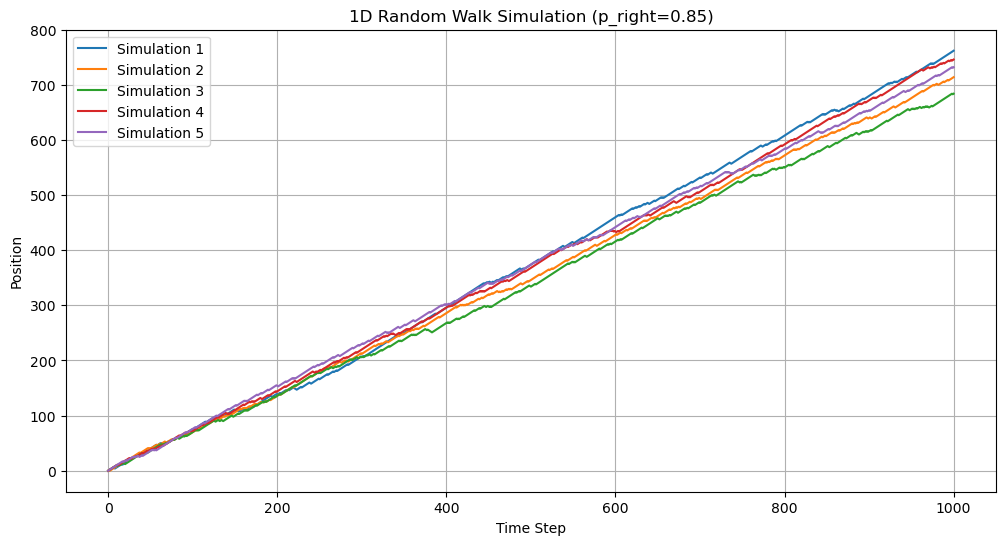

Final positions: [762, 714, 684, 746, 732]
Mean final position: 727.60
Standard deviation of final positions: 26.93


In [30]:
# Parameters
num_steps = 1000
p_right = 0.85
num_simulations = 5

# Run 5 simulations
plt.figure(figsize=(12, 6))
final_positions = []

for i in range(num_simulations):
    positions = simulate_1d_random_walk(num_steps, p_right)
    final_positions.append(positions[-1])
    
    # Plot this simulation
    plt.plot(range(len(positions)), positions, label=f'Simulation {i+1}')

# Add plot details
plt.title(f'1D Random Walk Simulation (p_right={p_right})')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()

# Calculate statistics
mean_final_position = np.mean(final_positions)
std_final_position = np.std(final_positions)

print(f"Final positions: {final_positions}")
print(f"Mean final position: {mean_final_position:.2f}")
print(f"Standard deviation of final positions: {std_final_position:.2f}")

**Interpretation:**

The final position of the particle after 1000 steps varies across simulations due to the random nature of the walk. However, we expect the mean final position to be positive and quite large because of the strong rightward bias (p=0.85).

Theoretically, with a probability of 0.85 to move right and 0.15 to move left, we would expect an average drift of (0.85 - 0.15) = 0.7 units per step, or about 700 units after 1000 steps. The standard deviation gives us an indication of how much the final positions vary across the simulations.

## Question 2: Comparing 1D Random Walks with and without Drift

Suppose two particles perform 1D random walks starting from position 0:
- Particle A: Moves with a drift, i.e., p=0.7 (70% chance to move right).
- Particle B: Moves without drift, i.e., p=0.5 (equal probability both sides).

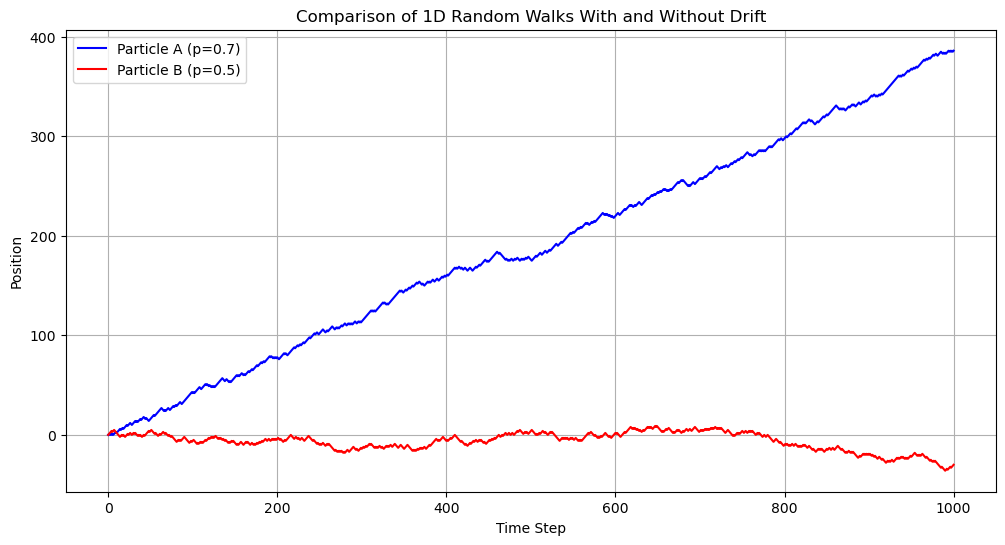

Particle A (with drift):
Mean final position: 392.40
Standard deviation: 15.25

Particle B (without drift):
Mean final position: 2.00
Standard deviation: 26.20


In [31]:
# Parameters
num_steps = 1000
p_right_A = 0.7  # With drift
p_right_B = 0.5  # No drift
num_simulations = 5  # For statistics

# Run one simulation of each type and plot
plt.figure(figsize=(12, 6))

# Initialize arrays to store multiple simulation results
final_positions_A = []
final_positions_B = []

# First, plot one example of each
positions_A = simulate_1d_random_walk(num_steps, p_right_A)
positions_B = simulate_1d_random_walk(num_steps, p_right_B)

plt.plot(range(len(positions_A)), positions_A, label='Particle A (p=0.7)', color='blue')
plt.plot(range(len(positions_B)), positions_B, label='Particle B (p=0.5)', color='red')

# Add plot details
plt.title('Comparison of 1D Random Walks With and Without Drift')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
plt.show()

# Run multiple simulations for statistics
for _ in range(num_simulations):
    positions_A = simulate_1d_random_walk(num_steps, p_right_A)
    positions_B = simulate_1d_random_walk(num_steps, p_right_B)
    
    final_positions_A.append(positions_A[-1])
    final_positions_B.append(positions_B[-1])

# Calculate statistics
mean_A = np.mean(final_positions_A)
std_A = np.std(final_positions_A)

mean_B = np.mean(final_positions_B)
std_B = np.std(final_positions_B)

print("Particle A (with drift):")
print(f"Mean final position: {mean_A:.2f}")
print(f"Standard deviation: {std_A:.2f}")
print("\nParticle B (without drift):")
print(f"Mean final position: {mean_B:.2f}")
print(f"Standard deviation: {std_B:.2f}")

**Interpretation:**

The comparison between the two particles illustrates how drift (bias) affects a random walk:

1. **Particle A (p=0.7)**: With a rightward bias, we expect a net movement to the right. Theoretically, the expected drift per step is (0.7 - 0.3) = 0.4 units, so after 1000 steps, we would expect an average position of around 400.

2. **Particle B (p=0.5)**: With equal probability of moving left or right, we expect the average position to be close to 0 after many simulations. However, any single simulation can end up quite far from the origin due to the random nature of the walk.

3. **Standard Deviation**: The standard deviation for the unbiased walk (Particle B) is typically larger than for a biased walk of the same length. This is because the unbiased walk is more likely to spend time revisiting positions, while the biased walk tends to move more consistently in one direction.

## Question 3: Simulating a 2D Random Walk (Unbiased)

A mosquito trapped in a square grid moves randomly:
- Up, Down, Left, or Right with equal probability (25%) in each direction.
- The mosquito starts at coordinate (0,0).

In [32]:
def simulate_2d_random_walk(steps, probabilities=None):
    """
    Simulate a 2D random walk.
    
    Parameters:
    steps (int): Number of steps to simulate
    probabilities (list): List of probabilities [east, west, north, south]
                         If None, equal probabilities (0.25 each) are used
    
    Returns:
    tuple: Lists of x and y coordinates at each step
    """
    if probabilities is None:
        probabilities = [0.25, 0.25, 0.25, 0.25]  # Equal probability in all directions
    
    # Ensure probabilities sum to 1
    assert abs(sum(probabilities) - 1.0) < 1e-10, "Probabilities must sum to 1"
    
    x, y = 0, 0  # Starting position
    x_positions, y_positions = [x], [y]  # Lists to store positions
    
    # Define possible movements: east, west, north, south
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    # Create cumulative probabilities for random selection
    cum_probs = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
    
    for _ in range(steps):
        # Generate random number and determine direction
        r = random.random()
        
        # Find which direction to move
        for i, threshold in enumerate(cum_probs):
            if r <= threshold:
                dx, dy = directions[i]
                break
        
        # Update position
        x += dx
        y += dy
        
        x_positions.append(x)
        y_positions.append(y)
    
    return x_positions, y_positions

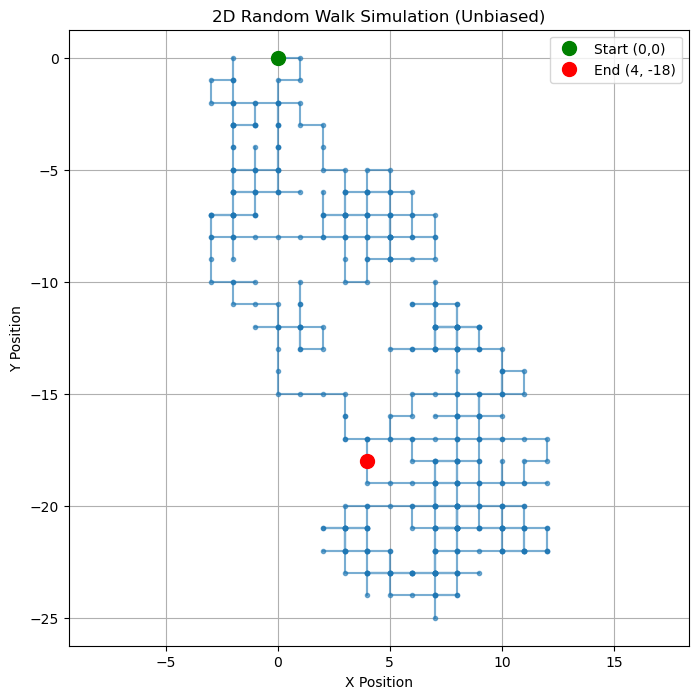

Final position: (4, -18)
Distance from origin: 18.44 units

Statistics from 10 simulations:
Average distance from origin: 11.79 units
Standard deviation of distance: 6.46 units


In [33]:
# Parameters
num_steps = 500
num_simulations = 10

# Run a single simulation first for visualization
x_positions, y_positions = simulate_2d_random_walk(num_steps)

# Calculate final position and distance
final_x, final_y = x_positions[-1], y_positions[-1]
final_distance = np.sqrt(final_x**2 + final_y**2)

# Plot the path
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, '-o', alpha=0.6, markersize=3)
plt.plot(x_positions[0], y_positions[0], 'go', markersize=10, label='Start (0,0)')
plt.plot(final_x, final_y, 'ro', markersize=10, label=f'End ({final_x}, {final_y})')

plt.title('2D Random Walk Simulation (Unbiased)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

print(f"Final position: ({final_x}, {final_y})")
print(f"Distance from origin: {final_distance:.2f} units")

# Run multiple simulations for statistics
distances = []

for _ in range(num_simulations):
    x_pos, y_pos = simulate_2d_random_walk(num_steps)
    distance = np.sqrt(x_pos[-1]**2 + y_pos[-1]**2)
    distances.append(distance)

mean_distance = np.mean(distances)
std_distance = np.std(distances)

print("\nStatistics from 10 simulations:")
print(f"Average distance from origin: {mean_distance:.2f} units")
print(f"Standard deviation of distance: {std_distance:.2f} units")

**Interpretation:**

In a 2D unbiased random walk (equal probability in all four directions), we observe that:

1. The mosquito's path is highly irregular, with no preferred direction.

2. Theoretically, for a 2D random walk, the expected distance from the origin after N steps is approximately proportional to the square root of N. For 500 steps, we would expect an average distance of around 22.4 units (√500).

3. The actual average distance from our simulations may vary from this theoretical value due to the limited number of simulations and the random nature of the walk.

4. Despite starting at the origin, the mosquito can end up quite far away after 500 steps, highlighting how random movement can lead to significant displacement over time.

5. The standard deviation of the distance gives us an indication of how much the final positions vary across different simulations.

## Question 4: Comparing 2D Random Walks with Bias vs No Bias

A person walks randomly in a 2D grid but with a slight bias towards the East (right).
- In each step:
  - Move East: 40% probability
  - Move West: 20% probability
  - Move North: 20% probability
  - Move South: 20% probability

The person starts at (0,0).

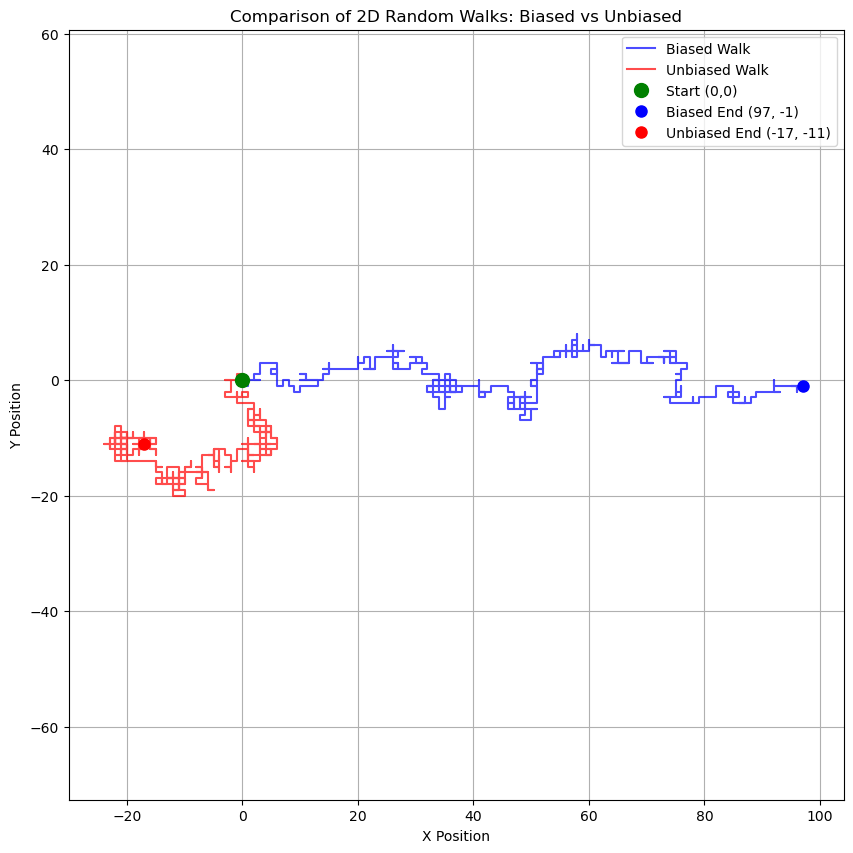

Biased Random Walk:
Final position: (97, -1)
Distance from origin: 97.01 units

Unbiased Random Walk:
Final position: (-17, -11)
Distance from origin: 20.25 units


In [34]:
# Parameters
num_steps = 500
num_simulations = 10

# Define probabilities for biased walk [east, west, north, south]
biased_probs = [0.4, 0.2, 0.2, 0.2]
unbiased_probs = [0.25, 0.25, 0.25, 0.25]

# Run one simulation of each type for visualization
x_biased, y_biased = simulate_2d_random_walk(num_steps, biased_probs)
x_unbiased, y_unbiased = simulate_2d_random_walk(num_steps, unbiased_probs)

# Calculate final positions and distances
final_x_biased, final_y_biased = x_biased[-1], y_biased[-1]
final_distance_biased = np.sqrt(final_x_biased**2 + final_y_biased**2)

final_x_unbiased, final_y_unbiased = x_unbiased[-1], y_unbiased[-1]
final_distance_unbiased = np.sqrt(final_x_unbiased**2 + final_y_unbiased**2)

# Plot both paths
plt.figure(figsize=(10, 10))
plt.plot(x_biased, y_biased, '-', color='blue', alpha=0.7, label='Biased Walk')
plt.plot(x_unbiased, y_unbiased, '-', color='red', alpha=0.7, label='Unbiased Walk')

plt.plot(0, 0, 'go', markersize=10, label='Start (0,0)')
plt.plot(final_x_biased, final_y_biased, 'bo', markersize=8, label=f'Biased End ({final_x_biased}, {final_y_biased})')
plt.plot(final_x_unbiased, final_y_unbiased, 'ro', markersize=8, label=f'Unbiased End ({final_x_unbiased}, {final_y_unbiased})')

plt.title('Comparison of 2D Random Walks: Biased vs Unbiased')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

print("Biased Random Walk:")
print(f"Final position: ({final_x_biased}, {final_y_biased})")
print(f"Distance from origin: {final_distance_biased:.2f} units")

print("\nUnbiased Random Walk:")
print(f"Final position: ({final_x_unbiased}, {final_y_unbiased})")
print(f"Distance from origin: {final_distance_unbiased:.2f} units")

In [35]:
# Run multiple simulations for statistics
biased_distances = []
unbiased_distances = []
biased_final_x = []

for _ in range(num_simulations):
    # Biased simulation
    x_bias, y_bias = simulate_2d_random_walk(num_steps, biased_probs)
    distance_bias = np.sqrt(x_bias[-1]**2 + y_bias[-1]**2)
    biased_distances.append(distance_bias)
    biased_final_x.append(x_bias[-1])
    
    # Unbiased simulation
    x_unbias, y_unbias = simulate_2d_random_walk(num_steps, unbiased_probs)
    distance_unbias = np.sqrt(x_unbias[-1]**2 + y_unbias[-1]**2)
    unbiased_distances.append(distance_unbias)

# Calculate statistics
mean_biased = np.mean(biased_distances)
std_biased = np.std(biased_distances)
mean_x_biased = np.mean(biased_final_x)

mean_unbiased = np.mean(unbiased_distances)
std_unbiased = np.std(unbiased_distances)

print("\nStatistics from 10 simulations:")
print("Biased Random Walk:")
print(f"Average distance from origin: {mean_biased:.2f} units")
print(f"Standard deviation of distance: {std_biased:.2f} units")
print(f"Average final x-position: {mean_x_biased:.2f}")

print("\nUnbiased Random Walk:")
print(f"Average distance from origin: {mean_unbiased:.2f} units")
print(f"Standard deviation of distance: {std_unbiased:.2f} units")


Statistics from 10 simulations:
Biased Random Walk:
Average distance from origin: 98.37 units
Standard deviation of distance: 22.26 units
Average final x-position: 97.70

Unbiased Random Walk:
Average distance from origin: 21.96 units
Standard deviation of distance: 9.48 units


**Interpretation:**

1. **Why does the biased random walk drift to the east?**
   - The biased random walk has a 40% probability of moving east compared to 20% for each other direction. This creates a net drift toward the east (positive x-direction). Over many steps, this bias accumulates and results in a significant eastward displacement.
   - Theoretically, after 500 steps with a 20% east bias (40% - 20%), we would expect an average eastward displacement of around 100 units (0.2 × 500).

2. **How does drift affect the standard deviation of the final position?**
   - The biased random walk typically has a larger standard deviation in the total distance from the origin compared to the unbiased walk. This is because the bias pushes the walker consistently in one direction, allowing it to cover more overall distance.
   - However, the standard deviation in the direction perpendicular to the bias (in this case, the y-direction) remains similar to that of an unbiased walk.
   - The variance in the biased direction (x) is different from the unbiased case because the random walker consistently moves in that direction rather than exploring equally in both positive and negative directions.

3. **What real-world phenomena could this simulation represent?**
   - **Wind drift**: Particles or objects (like seeds, dust, or insects) carried by wind that predominantly blows in one direction.
   - **Ocean currents**: Marine organisms or debris that drift with currents that have a prevailing direction.
   - **Animal migration with environmental cues**: Animals might move randomly but with a slight bias toward food sources, water, or mating grounds.
   - **Diffusion in a medium with force applied**: Molecules diffusing through a liquid or gas with an electric field or gravity affecting their movement.
   - **Human movement patterns**: People exploring a new area might wander somewhat randomly but with a bias toward landmarks or points of interest.
   - **Foraging behavior**: Many animals search for food in patterns that combine random exploration with directional biases toward areas more likely to contain resources.
   
   The simulation demonstrates how even a small bias in movement probabilities can lead to significant directional drift over time, which is a common phenomenon in many natural systems.

In [36]:
# Perform garbage collection and recheck memory usage
clean_memory()

Memory usage during after garbage collection: 45.6%
